# AGYW_PREV DATIM

In [1]:
# load the modules
from layeringOfServices import DREAMS_MASTERSHEET
#multiples outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from re import sub
from pandas import DataFrame

## AGYW_PREV

In [3]:
pipo = list(DREAMS_MASTERSHEET.agyw_period_range.unique())
pipo.append("Total")
sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])

['10-14', '15-19', '20-24']

In [4]:
sorted(pipo)


['0-6 months', '07-12 months', '13-24 months', '25+ months', 'Total']

In [5]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  DREAMS_MASTERSHEET
        self. __total_mastersheet = self.__data.code.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")]
        else:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")&(self.__data.actual_commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.code.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["partial_primary_services"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.partial_primary_services == "primary_part_services"]  
        self.__agyw_prevI_total = self.__agyw_prevI.code.count()
        self.__agyw_prevII_total = self.__agyw_prevII.code.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.code.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.condoms == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        #elif (df.ps_20_24 == "condoms&hts&curriculum"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        elif (df.ps_20_24 == "condoms&curriculum" and df.hts == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date" or df.condoms == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        #elif (df.ps_20_24 == "condoms&hts&curriculum") and (df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        elif (df.ps_20_24 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range == "15-19") and ((df.condoms == "tested_on_given_date" and df.dreams_curriculum == "curriculum_inc") or (df.condoms == "errata" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        #elif (df.age_range == "20-24") and ((df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="tested_on_given_date")):
        elif (df.age_range == "20-24") and ((df.condoms == "tested_on_given_date" and df.dreams_curriculum == "curriculum_inc") or (df.condoms == "errata" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        else:
            return "invalid"
         
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII

    __PERIOD_DATIM = sorted(list(DREAMS_MASTERSHEET.agyw_period_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final

In [6]:
%%capture
datim = AgywPrev()

In [7]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()

26056

17164

'DATIM'

6319

1277

6691

14287

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,636,3433,781,0,4850
1,15-19,123,583,172,0,878
2,20-24,52,411,128,0,591


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,108,545,125,0,778
1,15-19,17,208,71,0,296
2,20-24,9,149,45,0,203


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,440,3123,916,0,4479
2,20-24,212,1524,476,0,2212


In [8]:
datim

<AgywPrev DATIM>

## AGYW_Prev_Commune

In [9]:
class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        #self.__data =  DREAMS_MASTERSHEET
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        
    
        
        

        

In [10]:
DREAMS_MASTERSHEET.actual_commune.unique()

array(['Verrettes', 'Delmas', 'Port-au-Prince', 'Carrefour', 'Limonade',
       'Plaine-du-Nord', 'Cap-Haïtien', 'Kenscoff', 'Dessalines',
       'Pétionville', 'Gressier', 'Saint-Marc', 'Tabarre', 'La Chapelle',
       'Milot', 'Liancourt', 'Quartier-Morin',
       "Petite Rivière de l'Artibonite", 'Grande Saline', 'Montrouis',
       'Desdunes'], dtype=object)

## dynamic

In [11]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in DREAMS_MASTERSHEET.actual_commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))
   

In [12]:
datimcommunes

[<AgywPrevCommune DATIM Verrettes>,
 <AgywPrevCommune DATIM Delmas>,
 <AgywPrevCommune DATIM Port-au-Prince>,
 <AgywPrevCommune DATIM Carrefour>,
 <AgywPrevCommune DATIM Limonade>,
 <AgywPrevCommune DATIM Plaine-du-Nord>,
 <AgywPrevCommune DATIM Cap-Haïtien>,
 <AgywPrevCommune DATIM Kenscoff>,
 <AgywPrevCommune DATIM Dessalines>,
 <AgywPrevCommune DATIM Pétionville>,
 <AgywPrevCommune DATIM Gressier>,
 <AgywPrevCommune DATIM Saint-Marc>,
 <AgywPrevCommune DATIM Tabarre>,
 <AgywPrevCommune DATIM La Chapelle>,
 <AgywPrevCommune DATIM Milot>,
 <AgywPrevCommune DATIM Liancourt>,
 <AgywPrevCommune DATIM Quartier-Morin>,
 <AgywPrevCommune DATIM Petite Rivière de l'Artibonite>,
 <AgywPrevCommune DATIM Grande Saline>,
 <AgywPrevCommune DATIM Montrouis>,
 <AgywPrevCommune DATIM Desdunes>]

In [13]:
#for dcommunes in datimcommunes:
#    dcommunes.total_mastersheet 
#    dcommunes.total_dreams_valid
##    dcommunes.who_am_i
  #  dcommunes.total_datimI
   # dcommunes.total_datimII
  #  dcommunes.total_datimIII
  ##  dcommunes.total_datim_general
  #  AgywPrevCommune.datim_titleI()
  #  dcommunes.datim_agyw_prevI()
  #  AgywPrevCommune.datim_titleII()
  ##  dcommunes.datim_agyw_prevII()
   # AgywPrevCommune.datim_titleIII()
   # dcommunes.datim_agyw_prevIII()
   # print(" ")
   # print(" ")
   # print(" ")
   # print(" ")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [15]:
datim.total_datim_general
target= 18000

data_plot = pd.DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})

14287

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9000.0, '18000')

Text(1.0, 7143.5, '14287')

Text(-80, -20, 'source: HIVHaiti')

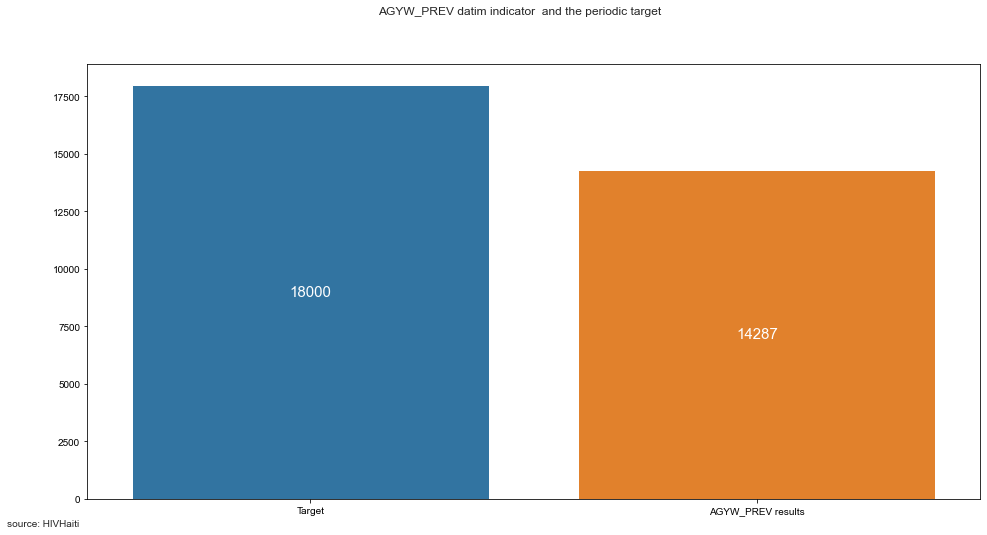

In [16]:
plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

In [17]:
datim.total_datimI
datim.total_datimII
datim.total_datimIII

6319

1277

6691

In [18]:
from plotnine import *

In [19]:
stack_data = pd.DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur"],
                        "label": ["target","composante I","composante II","composante III"],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII]
                  })

stack_data


,supp,label,data
0,target,target,18000
1,indicateur,composante I,6319
2,indicateur,composante II,1277
3,indicateur,composante III,6691


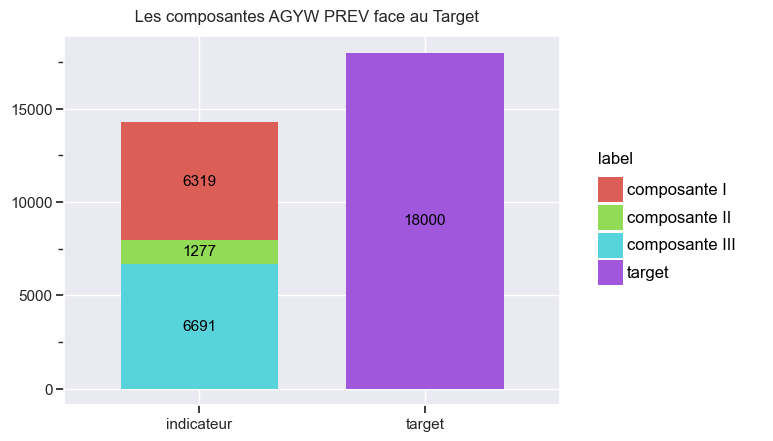

<ggplot: (151975463708)>

C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: composante_agywpre.png


In [20]:
p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywpre.png",dpi=1000)

## Les NO secondary

In [21]:
df= datim.data_dreams_valid

In [22]:
df.primary_only.unique()

array(['invalid', 'full_primary_only'], dtype=object)

In [23]:
df_prim_only = df[df.primary_only == "full_primary_only"]
df_part_primary = df[df.partial_primary_services == "primary_part_services"]
df_part_primary_no_secondary = df_part_primary[(df_part_primary.hts == "errata") & (df_part_primary.condoms == "errata") & (df_part_primary.post_care_treatment == "no") & (df_part_primary.socio_eco_app == "no")]

In [24]:
print("cohort")
total_cohort = df.code.count()
total_cohort

print("indicateur")
datim.total_datim_general

print("service primaire seulement")
total_prim_only = df_prim_only.code.count()
total_prim_only

print("Part services primaires")
total_part_primary = df_part_primary.code.count()
total_part_primary

print("Part service primaires no service secondaires")
total_part_primary_no_secondary = df_part_primary_no_secondary.code.count()
total_part_primary_no_secondary

cohort


17164

indicateur


14287

service primaire seulement


6319

Part services primaires


6691

Part service primaires no service secondaires


5825

In [25]:
data_for_MoreAGYWInfo = pd.DataFrame({
    "state":["valid cohort", "Target", "AGYW_PREV","Full primary only","Partial Primary","Partial primary no secondary"],
    "data":[total_cohort,18000,datim.total_datim_general,total_prim_only,total_part_primary,total_part_primary_no_secondary]
    
})

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Visualization of the AGYW with no secondary services')

Text(0.0, 8582.0, '17164')

Text(1.0, 9000.0, '18000')

Text(2.0, 7143.5, '14287')

Text(3.0, 3159.5, '6319')

Text(4.0, 3345.5, '6691')

Text(5.0, 2912.5, '5825')

Text(-80, -20, 'source: HIVHaiti')

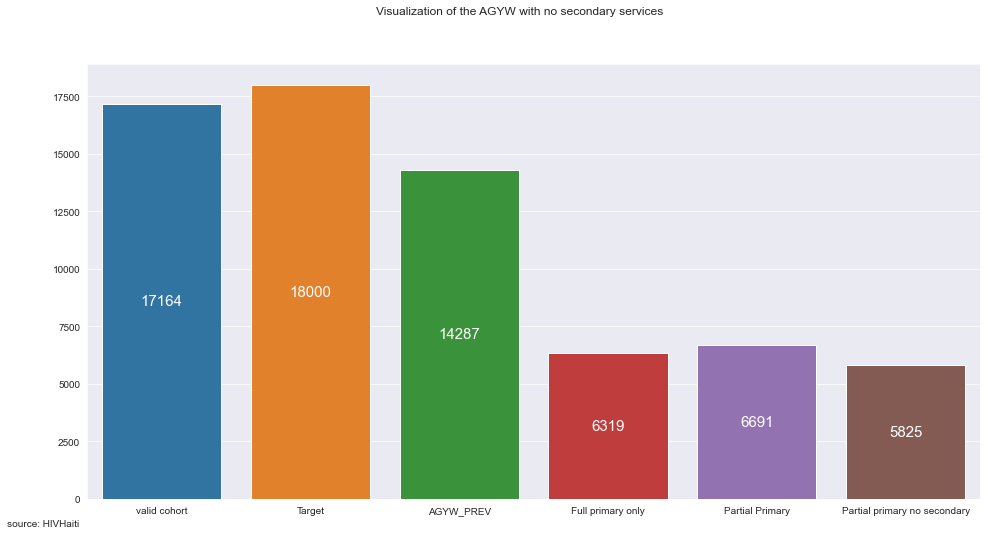

In [26]:
plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="state",y="data",data=data_for_MoreAGYWInfo)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Visualization of the AGYW with no secondary services")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_with_no_secondary",dpi=1000)

In [27]:
df_part_primary_no_secondary.to_excel("part_primary_no_secondary.xlsx",index=False,na_rep="NULL")
df_prim_only.to_excel("primary_only.xlsx",index=False,na_rep="NULL")